In [1]:
import re
import pandas as pd

In [2]:
f = open('socialteco.txt','r',encoding='utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

21/05/21, 4:43 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
21/05/21, 4:43 pm - You created group "Social Media - Teconico"
21/05/21, 4:43 pm - You added Aditya Mangal (SENIOR)
21/05/21, 4:43 pm - You added Utkarsh
21/05/21, 4:44 pm - You changed the group description
21/05/21, 4:52 pm - Aditya Mangal Sir joined using this group's invite link
21/05/21, 4:52 pm - Aditya Mangal (SENIOR) left
21/05/21, 6:19 pm - Disha Chauhan (Teconico): <Media omitted>
21/05/21, 6:19 pm - Disha Chauhan (Teconico): Approval kaun dega ye group pe?😄😄
21/05/21, 6:20 pm - Aditya Mangal Sir: Matlab
21/05/21, 6:20 pm - Aditya Mangal Sir added Param (App Developer) and Waseem Ahmed (TecoNico)
21/05/21, 6:21 pm - Harshit Kumar: 🥳🥳🥳🥳
21/05/21, 6:22 pm - Aditya Mangal Sir: Lag mast rahi hai
21/05/21, 6:22 pm - Aditya Mangal Sir: Ek dum HD
21/05/21, 6:22 pm - Harshit Kumar: keep one single (swipe left) post too
21/05/

In [5]:
pattern = '(\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s(?:pm|am)\s-\s)'
         #      21/     05/     21,        6:20       pm     - 

In [6]:
messages = re.split(pattern,data)[1:]
len(messages)

2494

In [7]:
messages = messages[1::2]
len(messages)

1247

In [8]:
date = re.findall(pattern,data)
len(date)

1247

In [9]:
df = pd.DataFrame({'user_message':messages,'date':date})
df

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,"21/05/21, 4:43 pm -"
1,"You created group ""Social Media - Teconico""\n","21/05/21, 4:43 pm -"
2,You added Aditya Mangal (SENIOR)\n,"21/05/21, 4:43 pm -"
3,You added Utkarsh\n,"21/05/21, 4:43 pm -"
4,You changed the group description\n,"21/05/21, 4:44 pm -"
...,...,...
1242,~Dimple(TN): Link?\n,"24/06/22, 2:29 pm -"
1243,Harshit Kumar: https://meet.google.com/gnr-vzr...,"24/06/22, 2:29 pm -"
1244,You changed the group description\n,"24/06/22, 3:07 pm -"
1245,Harshit Kumar: *please Check Description for T...,"24/06/22, 3:08 pm -"


In [10]:
df['date'] = pd.to_datetime(df['date'],format = '%d/%m/%y, %I:%M %p - ')



In [11]:
df

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2021-05-21 16:43:00
1,"You created group ""Social Media - Teconico""\n",2021-05-21 16:43:00
2,You added Aditya Mangal (SENIOR)\n,2021-05-21 16:43:00
3,You added Utkarsh\n,2021-05-21 16:43:00
4,You changed the group description\n,2021-05-21 16:44:00
...,...,...
1242,~Dimple(TN): Link?\n,2022-06-24 14:29:00
1243,Harshit Kumar: https://meet.google.com/gnr-vzr...,2022-06-24 14:29:00
1244,You changed the group description\n,2022-06-24 15:07:00
1245,Harshit Kumar: *please Check Description for T...,2022-06-24 15:08:00


In [12]:
df.shape

(1247, 2)

In [13]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s',message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])


In [14]:
df['users'] = users
df['message']=messages
df.drop(columns=['user_message'],inplace=True)

In [15]:
df.head(10)

,date,users,message
0,2021-05-21 16:43:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2021-05-21 16:43:00,group_notification,"You created group ""Social Media - Teconico""\n"
2,2021-05-21 16:43:00,group_notification,You added Aditya Mangal (SENIOR)\n
3,2021-05-21 16:43:00,group_notification,You added Utkarsh\n
4,2021-05-21 16:44:00,group_notification,You changed the group description\n
5,2021-05-21 16:52:00,group_notification,Aditya Mangal Sir joined using this group's in...
6,2021-05-21 16:52:00,group_notification,Aditya Mangal (SENIOR) left\n
7,2021-05-21 18:19:00,Disha Chauhan (Teconico),<Media omitted>\n
8,2021-05-21 18:19:00,Disha Chauhan (Teconico),Approval kaun dega ye group pe?😄😄\n
9,2021-05-21 18:20:00,Aditya Mangal Sir,Matlab\n


In [16]:
df['year']= df['date'].dt.year
df

,date,users,message,year
0,2021-05-21 16:43:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021
1,2021-05-21 16:43:00,group_notification,"You created group ""Social Media - Teconico""\n",2021
2,2021-05-21 16:43:00,group_notification,You added Aditya Mangal (SENIOR)\n,2021
3,2021-05-21 16:43:00,group_notification,You added Utkarsh\n,2021
4,2021-05-21 16:44:00,group_notification,You changed the group description\n,2021
...,...,...,...,...
1242,2022-06-24 14:29:00,~Dimple(TN),Link?\n,2022
1243,2022-06-24 14:29:00,Harshit Kumar,https://meet.google.com/gnr-vzri-vdq\n,2022
1244,2022-06-24 15:07:00,group_notification,You changed the group description\n,2022
1245,2022-06-24 15:08:00,Harshit Kumar,*please Check Description for Task Sheet*\n,2022


In [17]:
df['month'] = df['date'].dt.month_name()
df

,date,users,message,year,month
0,2021-05-21 16:43:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,May
1,2021-05-21 16:43:00,group_notification,"You created group ""Social Media - Teconico""\n",2021,May
2,2021-05-21 16:43:00,group_notification,You added Aditya Mangal (SENIOR)\n,2021,May
3,2021-05-21 16:43:00,group_notification,You added Utkarsh\n,2021,May
4,2021-05-21 16:44:00,group_notification,You changed the group description\n,2021,May
...,...,...,...,...,...
1242,2022-06-24 14:29:00,~Dimple(TN),Link?\n,2022,June
1243,2022-06-24 14:29:00,Harshit Kumar,https://meet.google.com/gnr-vzri-vdq\n,2022,June
1244,2022-06-24 15:07:00,group_notification,You changed the group description\n,2022,June
1245,2022-06-24 15:08:00,Harshit Kumar,*please Check Description for Task Sheet*\n,2022,June


In [18]:
df['day']= df['date'].dt.day
df

,date,users,message,year,month,day
0,2021-05-21 16:43:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,May,21
1,2021-05-21 16:43:00,group_notification,"You created group ""Social Media - Teconico""\n",2021,May,21
2,2021-05-21 16:43:00,group_notification,You added Aditya Mangal (SENIOR)\n,2021,May,21
3,2021-05-21 16:43:00,group_notification,You added Utkarsh\n,2021,May,21
4,2021-05-21 16:44:00,group_notification,You changed the group description\n,2021,May,21
...,...,...,...,...,...,...
1242,2022-06-24 14:29:00,~Dimple(TN),Link?\n,2022,June,24
1243,2022-06-24 14:29:00,Harshit Kumar,https://meet.google.com/gnr-vzri-vdq\n,2022,June,24
1244,2022-06-24 15:07:00,group_notification,You changed the group description\n,2022,June,24
1245,2022-06-24 15:08:00,Harshit Kumar,*please Check Description for Task Sheet*\n,2022,June,24


In [19]:
df['hour'] = df['date'].dt.hour
df

,date,users,message,year,month,day,hour
0,2021-05-21 16:43:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,May,21,16
1,2021-05-21 16:43:00,group_notification,"You created group ""Social Media - Teconico""\n",2021,May,21,16
2,2021-05-21 16:43:00,group_notification,You added Aditya Mangal (SENIOR)\n,2021,May,21,16
3,2021-05-21 16:43:00,group_notification,You added Utkarsh\n,2021,May,21,16
4,2021-05-21 16:44:00,group_notification,You changed the group description\n,2021,May,21,16
...,...,...,...,...,...,...,...
1242,2022-06-24 14:29:00,~Dimple(TN),Link?\n,2022,June,24,14
1243,2022-06-24 14:29:00,Harshit Kumar,https://meet.google.com/gnr-vzri-vdq\n,2022,June,24,14
1244,2022-06-24 15:07:00,group_notification,You changed the group description\n,2022,June,24,15
1245,2022-06-24 15:08:00,Harshit Kumar,*please Check Description for Task Sheet*\n,2022,June,24,15


In [20]:
df['minute'] = df['date'].dt.minute
df

,date,users,message,year,month,day,hour,minute
0,2021-05-21 16:43:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,May,21,16,43
1,2021-05-21 16:43:00,group_notification,"You created group ""Social Media - Teconico""\n",2021,May,21,16,43
2,2021-05-21 16:43:00,group_notification,You added Aditya Mangal (SENIOR)\n,2021,May,21,16,43
3,2021-05-21 16:43:00,group_notification,You added Utkarsh\n,2021,May,21,16,43
4,2021-05-21 16:44:00,group_notification,You changed the group description\n,2021,May,21,16,44
...,...,...,...,...,...,...,...,...
1242,2022-06-24 14:29:00,~Dimple(TN),Link?\n,2022,June,24,14,29
1243,2022-06-24 14:29:00,Harshit Kumar,https://meet.google.com/gnr-vzri-vdq\n,2022,June,24,14,29
1244,2022-06-24 15:07:00,group_notification,You changed the group description\n,2022,June,24,15,7
1245,2022-06-24 15:08:00,Harshit Kumar,*please Check Description for Task Sheet*\n,2022,June,24,15,8


In [21]:
words= []
for messages in df['message']:
    words.extend(messages.split())

In [22]:
len(words)

8310

In [23]:
df[df['message'] == '<Media omitted>\n'].shape[0]

205

In [24]:
link = []
for message in df['message']:
    urls = re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', message)
    link.extend(urls)

In [25]:
len(link)

83

In [26]:
sen = 'billi boli meow mewo https://stackoverflow.com/questions/839994/extracting-a-url-in-python hello billi boli meow'

In [27]:
url = '(\b((?:https?://)?(?:(?:www\.)?(?:[\da-z\.-]+)\.(?:[a-z]{2,6})|(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)|(?:(?:[0-9a-fA-F]{1,4}:){7,7}[0-9a-fA-F]{1,4}|(?:[0-9a-fA-F]{1,4}:){1,7}:|(?:[0-9a-fA-F]{1,4}:){1,6}:[0-9a-fA-F]{1,4}|(?:[0-9a-fA-F]{1,4}:){1,5}(?::[0-9a-fA-F]{1,4}){1,2}|(?:[0-9a-fA-F]{1,4}:){1,4}(?::[0-9a-fA-F]{1,4}){1,3}|(?:[0-9a-fA-F]{1,4}:){1,3}(?::[0-9a-fA-F]{1,4}){1,4}|(?:[0-9a-fA-F]{1,4}:){1,2}(?::[0-9a-fA-F]{1,4}){1,5}|[0-9a-fA-F]{1,4}:(?:(?::[0-9a-fA-F]{1,4}){1,6})|:(?:(?::[0-9a-fA-F]{1,4}){1,7}|:)|fe80:(?::[0-9a-fA-F]{0,4}){0,4}%[0-9a-zA-Z]{1,}|::(?:ffff(?::0{1,4}){0,1}:){0,1}(?:(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])|(?:[0-9a-fA-F]{1,4}:){1,4}:(?:(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])))(?::[0-9]{1,4}|[1-5][0-9]{4}|6[0-4][0-9]{3}|65[0-4][0-9]{2}|655[0-2][0-9]|6553[0-5])?(?:/[\w\.-]*)*/?)\b)'


In [28]:
ur = re.findall(url,sen)
ur

[]

In [29]:
!python --version

Python 3.7.0


In [30]:
x= df['users'].value_counts().head()

In [31]:
import matplotlib.pyplot as plt

In [32]:
name = x.index
count = x.values

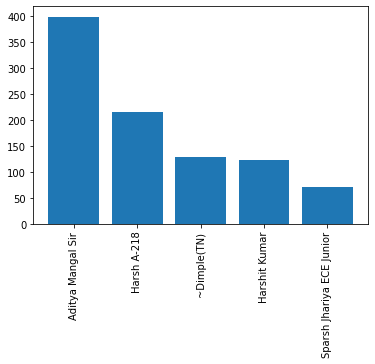

In [33]:
plt.bar(name,count)
plt.xticks(rotation = 'vertical')
plt.show()

In [34]:
round(df['users'].value_counts()/df.shape[0]*100,2).reset_index().rename(columns = {'index':'name','user':'percent'})

,name,users
0,Aditya Mangal Sir,31.92
1,Harsh A-218,17.16
2,~Dimple(TN),10.34
3,Harshit Kumar,9.86
4,Sparsh Jhariya ECE Junior,5.61
5,Disha Chauhan (Teconico),4.41
6,group_notification,3.85
7,+91 80765 41852,2.41
8,Vatsal (TecoNico),2.33
9,Vaibhav Sir,2.17


In [35]:
temp = df[df['users'] != 'group_notification']
temp  = temp[temp['message'] != '<Media omitted>\n']
temp

,date,users,message,year,month,day,hour,minute
8,2021-05-21 18:19:00,Disha Chauhan (Teconico),Approval kaun dega ye group pe?😄😄\n,2021,May,21,18,19
9,2021-05-21 18:20:00,Aditya Mangal Sir,Matlab\n,2021,May,21,18,20
11,2021-05-21 18:21:00,Harshit Kumar,🥳🥳🥳🥳\n,2021,May,21,18,21
12,2021-05-21 18:22:00,Aditya Mangal Sir,Lag mast rahi hai\n,2021,May,21,18,22
13,2021-05-21 18:22:00,Aditya Mangal Sir,Ek dum HD\n,2021,May,21,18,22
...,...,...,...,...,...,...,...,...
1241,2022-06-24 14:29:00,UV,Gimme a sec I'll ve there\n,2022,June,24,14,29
1242,2022-06-24 14:29:00,~Dimple(TN),Link?\n,2022,June,24,14,29
1243,2022-06-24 14:29:00,Harshit Kumar,https://meet.google.com/gnr-vzri-vdq\n,2022,June,24,14,29
1245,2022-06-24 15:08:00,Harshit Kumar,*please Check Description for Task Sheet*\n,2022,June,24,15,8


In [36]:
with open('hinglish_stopw.txt','r') as f:
    stop_words = f.read()
    print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [37]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)


In [38]:
words

['approval',
 'group',
 'pe?😄😄',
 'matlab',
 '🥳🥳🥳🥳',
 'mast',
 'dum',
 'hd',
 'single',
 '(swipe',
 'left)',
 'post',
 'software',
 'knsa',
 'h?',
 'adobe',
 'premiere',
 '👍👍thanks',
 'smji',
 'put',
 'insta',
 'reel..so',
 'wjy',
 'swipe',
 'left',
 '*why',
 'crousel',
 '(i',
 'forgot',
 'name)',
 'okau😂😂😂',
 '😁😁😁',
 'reels',
 'de?',
 'mehnat',
 'banaaya',
 'hai😆😆😆',
 'reel',
 '+',
 '[😂😂😂]',
 'rakhdo',
 'rahega',
 'okay👍',
 'welcome',
 'parvati',
 '🎉🎉',
 'welcome',
 'team🥳',
 'welcome',
 'team',
 '🙌',
 'thankyou',
 'promise',
 'contribute',
 'team',
 'abilities🙌🏽',
 'https://docs.google.com/document/d/1eg3avjunexrzxy1ih0w84q1sz5ikg5eyl55eav4wa8y/edit?usp=sharing',
 'parvati',
 'handling',
 'linkedin',
 'work.',
 'disha,ab',
 'post',
 'ho?',
 'data',
 'science',
 'post',
 'kaam',
 'utkarsh',
 '✌️',
 'ohhk',
 '@919460371910',
 'update?',
 'subha',
 'send',
 'krduga',
 'posts',
 '👍',
 'theme',
 '🔥🔥🔥',
 '++',
 'message',
 'deleted',
 'reel',
 'kre',
 'carousel???',
 'post',
 'prepare',
 '

In [39]:
words = []
for message in df['message']:
    words.extend(message.split())

In [40]:
from collections import Counter

In [41]:
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,<Media,205
1,omitted>,205
2,the,171
3,and,110
4,to,94
5,for,85
6,it,82
7,in,81
8,we,68
9,you,68


In [42]:
df['month_num'] = df['date'].dt.month

In [43]:
time_line = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [44]:
time_line

,year,month_num,month,message
0,2021,5,May,73
1,2021,6,June,296
2,2021,7,July,32
3,2021,8,August,4
4,2021,10,October,174
5,2021,11,November,286
6,2021,12,December,223
7,2022,1,January,78
8,2022,2,February,5
9,2022,3,March,38


In [45]:
time = []
for i in range(time_line.shape[0]):
    time.append(time_line['month'][i] + "-" + str(time_line['year'][i]))

In [46]:
time_line['time'] = time

In [47]:
time_line

,year,month_num,month,message,time
0,2021,5,May,73,May-2021
1,2021,6,June,296,June-2021
2,2021,7,July,32,July-2021
3,2021,8,August,4,August-2021
4,2021,10,October,174,October-2021
5,2021,11,November,286,November-2021
6,2021,12,December,223,December-2021
7,2022,1,January,78,January-2022
8,2022,2,February,5,February-2022
9,2022,3,March,38,March-2022


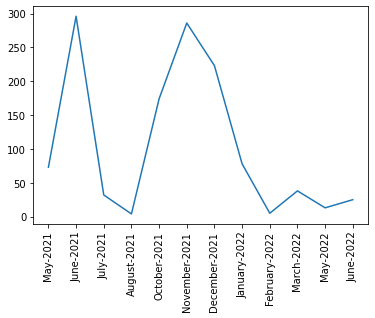

In [48]:
plt.plot(time_line['time'],time_line['message'])
plt.xticks(rotation = 'vertical')
plt.show()

In [49]:
df['only_date']=df['date'].dt.date

In [50]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()
daily_timeline

,only_date,message
0,2021-05-21,31
1,2021-05-22,6
2,2021-05-23,4
3,2021-05-25,3
4,2021-05-26,4
...,...,...
112,2022-05-31,2
113,2022-06-01,2
114,2022-06-04,3
115,2022-06-23,12


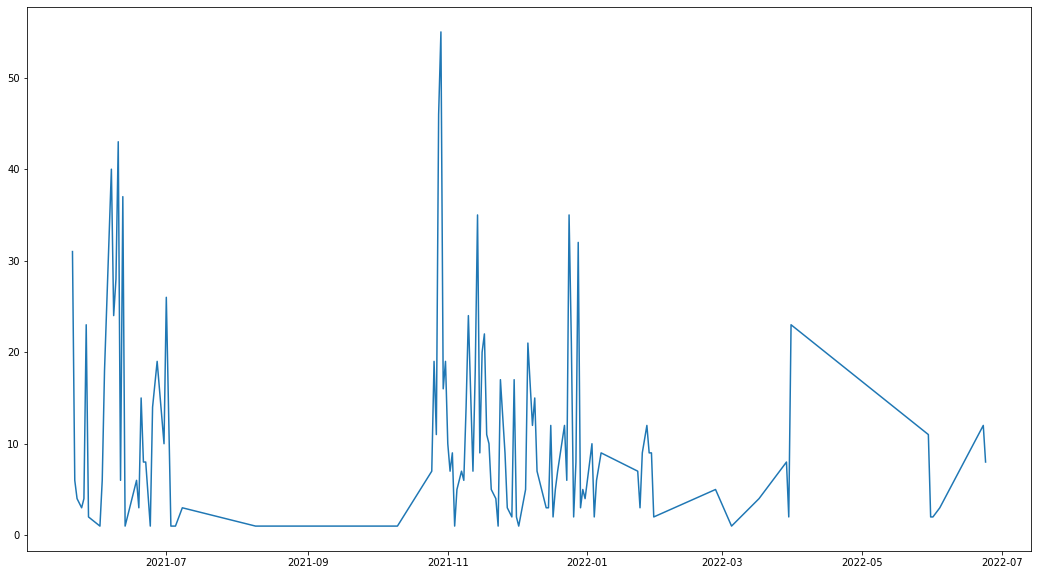

In [51]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [52]:
df['day_name'] = df['date'].dt.day_name()

In [53]:
df['day_name'].value_counts()

Thursday     269
Friday       237
Tuesday      172
Wednesday    169
Monday       142
Saturday     133
Sunday       125
Name: day_name, dtype: int64

In [54]:
df.head()

,date,users,message,year,month,day,hour,minute,month_num,only_date,day_name
0,2021-05-21 16:43:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,May,21,16,43,5,2021-05-21,Friday
1,2021-05-21 16:43:00,group_notification,"You created group ""Social Media - Teconico""\n",2021,May,21,16,43,5,2021-05-21,Friday
2,2021-05-21 16:43:00,group_notification,You added Aditya Mangal (SENIOR)\n,2021,May,21,16,43,5,2021-05-21,Friday
3,2021-05-21 16:43:00,group_notification,You added Utkarsh\n,2021,May,21,16,43,5,2021-05-21,Friday
4,2021-05-21 16:44:00,group_notification,You changed the group description\n,2021,May,21,16,44,5,2021-05-21,Friday


In [55]:
busy_hour = df.groupby('hour').count()['message'].reset_index()

In [56]:
busy_hour

,hour,message
0,0,18
1,1,16
2,2,5
3,3,5
4,4,2
5,6,1
6,7,5
7,8,6
8,9,37
9,10,51


In [57]:
period = []
for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour)+'-'+str('00'))
    elif hour == 0:
        period.append(str('00')+'-'+str(hour+1))
    else:
        period.append(str(hour)+"-"+str(hour+1))

In [58]:
df['period']=period

In [59]:
import seaborn as sns

<AxesSubplot:xlabel='period', ylabel='day_name'>

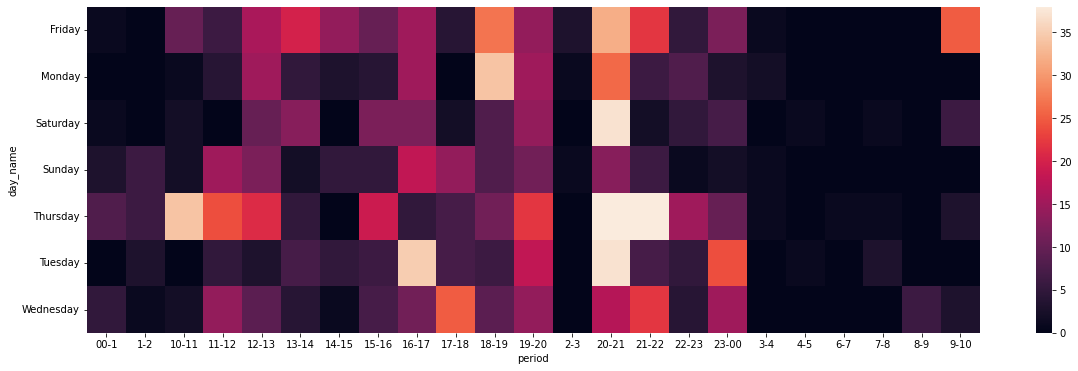

In [61]:
plt.figure(figsize = (20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values = 'message',aggfunc='count').fillna(0))